<a href="https://colab.research.google.com/github/benasphy/K-means-iris/blob/main/K-means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

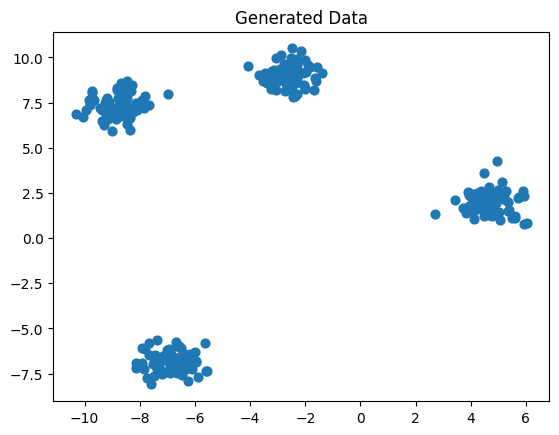

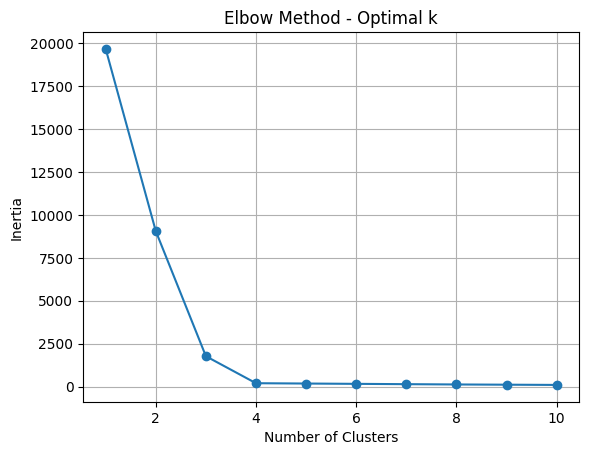

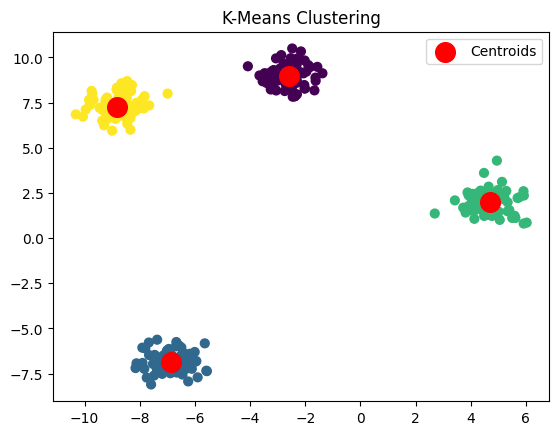

Silhouette Score (range -1 to 1): 0.8756
Dunn Index (higher is better): 0.8879


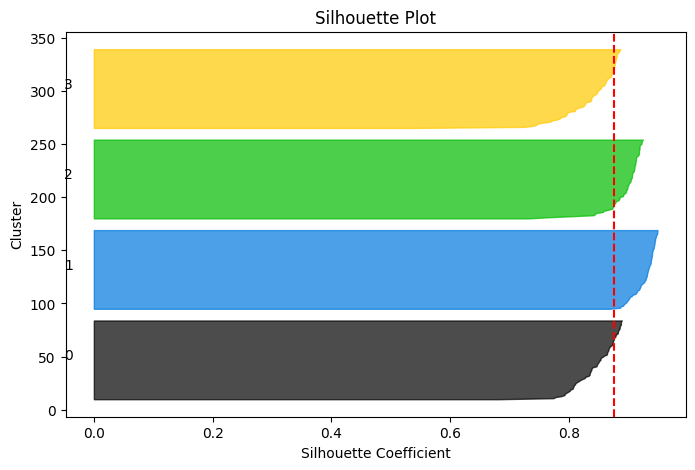

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import cdist


# Step 1: Generate Dataset

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title("Generated Data")
plt.show()


# Step 2: Elbow Method (Inertia)

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # Sum of squared distances to centroids

# Plot Elbow Curve
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


# Step 3: Choose k=4 (Elbow Point)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_


# Step 4: Visualize Clusters + Centroids

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


# Step 5: Evaluate Using Silhouette Score

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score (range -1 to 1): {sil_score:.4f}")


# Step 6: Dunn Index Calculation

def dunn_index(X, labels):
    distances = pairwise_distances(X)
    clusters = [np.where(labels == i)[0] for i in np.unique(labels)]

    min_intercluster = np.inf
    max_intracluster = 0

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            inter = np.min([distances[m, n] for m in clusters[i] for n in clusters[j]])
            min_intercluster = min(min_intercluster, inter)

    for cluster in clusters:
        intra = np.max([distances[m, n] for m in cluster for n in cluster])
        max_intracluster = max(max_intracluster, intra)

    return min_intercluster / max_intracluster

dunn = dunn_index(X, labels)
print(f"Dunn Index (higher is better): {dunn:.4f}")


# Step 7: Silhouette Plot

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
plt.figure(figsize=(8, 5))
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing

plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.axvline(x=sil_score, color="red", linestyle="--")
plt.show()
